##### tutorial addapted from http://www.knowbigdata.com/blog/predicting-income-level-analytics-casestudy-r

In [201]:
% matplotlib inline

In [227]:
# imports

import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [204]:
# hide warnings

import warnings
warnings.filterwarnings('ignore')

In [203]:
# download and read the data

header = ["age", "workclass", "fnlwgt", "education", "educationnum", "maritalstatus", "occupation", 
              "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek", "nativecountry", 
              "incomelevel"]

train_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                         names=header,
                         sep=',\s',
                         na_values=["?"])
test_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=header)

In [170]:
train_data.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [171]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        30725 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       30718 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    31978 non-null object
incomelevel      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


##### clean NAs

In [172]:
# number of NAs
train_data.isnull().sum()

age                 0
workclass        1836
fnlwgt              0
education           0
educationnum        0
maritalstatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry     583
incomelevel         0
dtype: int64

In [173]:
train_data.describe(include='all')

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
count,32561.000000,30725,32561.000000,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,189778.366512,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,105549.977697,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,12285.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,117827.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,178356.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,237051.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [174]:
print("<=50K class: ", train_data.incomelevel.str.contains('<=50K').sum())
print(">50K class: ", train_data.incomelevel.str.contains('>50K').sum())

<=50K class:  24720
>50K class:  7841


In [175]:
# remove NAs columns
clean_train_data = train_data.dropna()

clean_train_data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
incomelevel      0
dtype: int64

In [176]:
# remove 'fnlwgt' attribute

print("before: ", clean_train_data.columns.values)

clean_train_data = clean_train_data.drop('fnlwgt', 1)

print("after: ", clean_train_data.columns.values)

before:  ['age' 'workclass' 'fnlwgt' 'education' 'educationnum' 'maritalstatus'
 'occupation' 'relationship' 'race' 'sex' 'capitalgain' 'capitalloss'
 'hoursperweek' 'nativecountry' 'incomelevel']
after:  ['age' 'workclass' 'education' 'educationnum' 'maritalstatus' 'occupation'
 'relationship' 'race' 'sex' 'capitalgain' 'capitalloss' 'hoursperweek'
 'nativecountry' 'incomelevel']


##### Explore the data

In [177]:
clean_train_data['age'].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

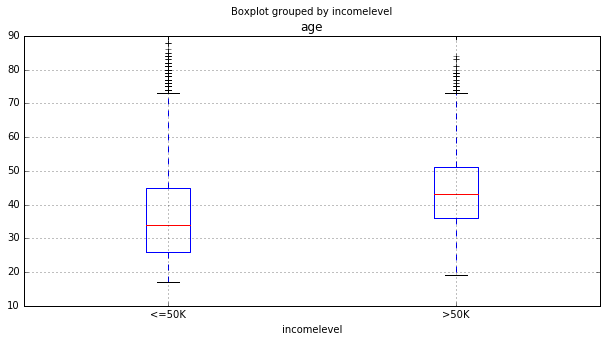

In [178]:
clean_train_data.boxplot(column='age', by='incomelevel', figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010007F98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013649C50>], dtype=object)

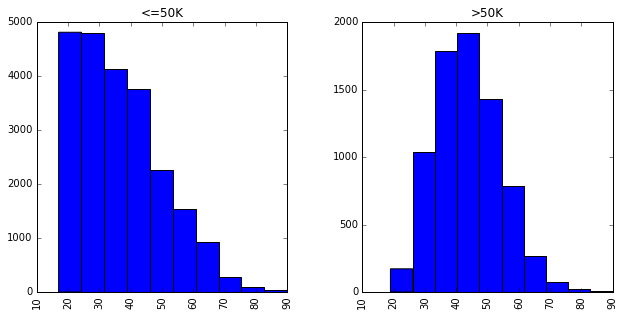

In [179]:
clean_train_data.hist(column='age', by='incomelevel', figsize=(10,5))

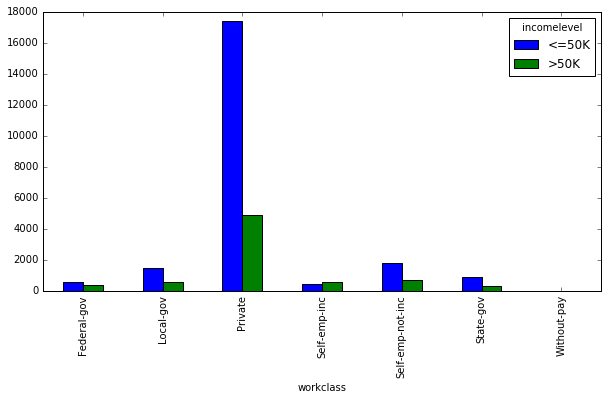

In [180]:
clean_train_data\
    .groupby('workclass')['incomelevel']\
    .value_counts()\
    .unstack()\
    .plot(kind='bar', figsize=(10,5))

##### Building the model

In [205]:
train_columns = header
train_columns.remove('incomelevel')
train_columns.remove('fnlwgt')

In [231]:
# transform nominal data
le = preprocessing.LabelEncoder()

def transform(data, le):
    le.fit(data)
    return le.transform(data)

clean_train_data.workclass = transform(clean_train_data.workclass, le)
clean_train_data.education = transform(clean_train_data.education, le)
clean_train_data.maritalstatus = transform(clean_train_data.maritalstatus, le)
clean_train_data.occupation = transform(clean_train_data.occupation, le)
clean_train_data.relationship = transform(clean_train_data.relationship, le)
clean_train_data.race = transform(clean_train_data.race, le)
clean_train_data.sex = transform(clean_train_data.sex, le)
clean_train_data.nativecountry = transform(clean_train_data.nativecountry, le)
clean_train_data.incomelevel = transform(clean_train_data.incomelevel, le)

clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age              30162 non-null int64
workclass        30162 non-null int64
education        30162 non-null int64
educationnum     30162 non-null int64
maritalstatus    30162 non-null int64
occupation       30162 non-null int64
relationship     30162 non-null int64
race             30162 non-null int64
sex              30162 non-null int64
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null int64
incomelevel      30162 non-null int64
dtypes: int64(14)
memory usage: 3.5 MB


In [232]:
# build model
x_train = clean_train_data[list(train_columns)].values
y_train = clean_train_data['incomelevel'].values

boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200,
    learning_rate=1)

clf = boost.fit(x_train, y_train)

In [233]:
# prepare the test data
clean_test_data = test_data.dropna()
clean_test_data = clean_test_data.drop('fnlwgt', 1)

clean_test_data.workclass = transform(clean_test_data.workclass, le)
clean_test_data.education = transform(clean_test_data.education, le)
clean_test_data.maritalstatus = transform(clean_test_data.maritalstatus, le)
clean_test_data.occupation = transform(clean_test_data.occupation, le)
clean_test_data.relationship = transform(clean_test_data.relationship, le)
clean_test_data.race = transform(clean_test_data.race, le)
clean_test_data.sex = transform(clean_test_data.sex, le)
clean_test_data.nativecountry = transform(clean_test_data.nativecountry, le)
clean_test_data.incomelevel = transform(clean_test_data.incomelevel, le)

x_test = clean_test_data[list(train_columns)].values
y_test = clean_test_data['incomelevel'].values

In [237]:
y_pred = clf.predict(x_test)
labels = list(set(y_test)) 

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred, labels=labels)

0.844051348197


array([[11962,   473],
       [ 2066,  1780]])